In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.util import ngrams
from collections import Counter


In [3]:
train = '/content/drive/My Drive/Colab Notebooks/train.csv'

test = '/content/drive/My Drive/Colab Notebooks/test.csv'



In [4]:
train = pd.read_csv(train, header=0)
test = pd.read_csv(test, header=0)


In [ ]:
train.head(5)

,review,sentiment
0,I caught this little gem totally by accident b...,positive
1,I can't believe that I let myself into this mo...,negative
2,*spoiler alert!* it just gets to me the nerve ...,negative
3,If there's one thing I've learnt from watching...,negative
4,"I remember when this was in theaters, reviews ...",negative


In [5]:
# Basic Descriptive Analysis
print("Number of reviews:", train.shape[0])
print("Reviews by sentiment:", train['sentiment'].value_counts())



Number of reviews: 40000
Reviews by sentiment: sentiment
positive    20000
negative    20000
Name: count, dtype: int64


In [13]:
import re

def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # replace multiple whitespaces with single space
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text

train['review'] = train['review'].apply(clean_text)
test['review'] = test['review'].apply(clean_text)


In [15]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')


try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# tokenize text using NLTK
def nltk_tokenize(text):
    # Tokenizes a string into words
    tokens = word_tokenize(text)
    return tokens

train['tokens'] = train['review'].apply(nltk_tokenize)
test['tokens'] = test['review'].apply(nltk_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
#removes stop words

import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))


def remove_stopwords( tokens):
    # Filter tokens to remove stopwords
    return [token for token in tokens if token.lower() not in nltk_stopwords]


train['tokens'] = train['tokens'].apply(remove_stopwords)
test['tokens'] = test['tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: xlabel='Samples', ylabel='Counts'>

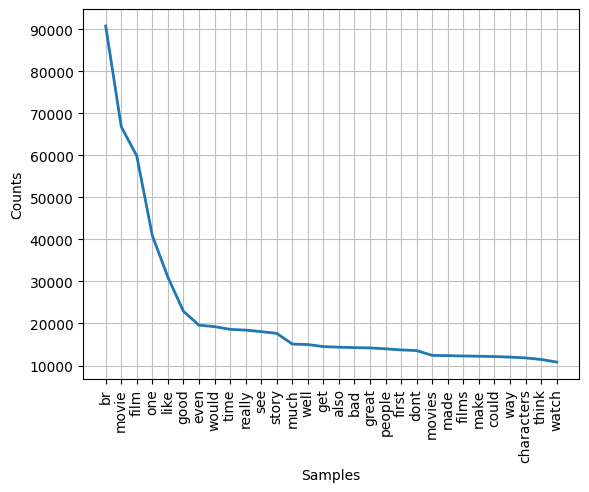

In [28]:
# Word Frequency Analysis

all_words = [word for token_list in train['tokens'] for word in token_list]


freq_dist = nltk.FreqDist(all_words)
freq_dist.plot(30, cumulative=False)

In [32]:

from collections import Counter

positive_words = [word for tokens in train[train['sentiment'] == 'positive']['tokens'] for word in tokens]
negative_words = [word for tokens in train[train['sentiment'] == 'negative']['tokens'] for word in tokens]


print("Top 10 positive words:", Counter(positive_words).most_common(10))
print("Top 10 negative words:", Counter(negative_words).most_common(10))




Top 10 positive words: [('br', 43805), ('film', 31762), ('movie', 28754), ('one', 20914), ('like', 13538), ('good', 11520), ('great', 10118), ('story', 9863), ('see', 9523), ('time', 9409)]
Top 10 negative words: [('br', 46995), ('movie', 38097), ('film', 28097), ('one', 19987), ('like', 17494), ('even', 12062), ('bad', 11389), ('good', 11370), ('would', 10988), ('really', 9857)]


The most popular words describe used in dataset show its relation to movie reviews, in most popular positive words we can see some positive feedback as "like", "great". In negative there are some words showing negative feedback as "bad".

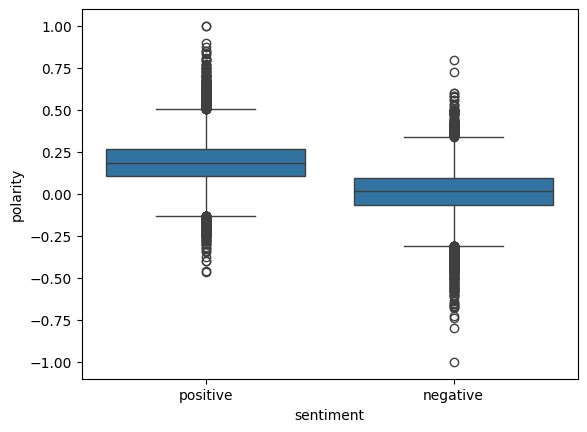

In [29]:
#  Text Analysis using TextBlob
train['polarity'] = train['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
train['subjectivity'] = train['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
sns.boxplot(x='sentiment', y='polarity', data=train)
plt.show()

Both positive and negative sentiments have a median polarity near zero but the positive sentiment category shows a median slightly above zero.
Both categories show a wide range of polarity from -1 to 1, indicating variability in the intensity of sentiment within each category. This suggests that there are positive texts with negative polarity scores and vice versa, which could be due to sarcasm, mixed sentiments, or inaccuracies in the polarity scoring method.
There are numerous outliers in both categories, especially in the positive category, where some reviews have extremely negative polarity scores

In [ ]:
#  Missing Data
print("Missing values per column:\n", train.isnull().sum())
train.dropna(subset=['review', 'sentiment'], inplace=True)

# removing duplicates
print("Number of duplicates:", train.duplicated(subset=['review']).sum())
train.drop_duplicates(subset=['review'], inplace=True)

Missing values per column:
 review           0
sentiment        0
review_length    0
polarity         0
subjectivity     0
dtype: int64
Number of duplicates: 272


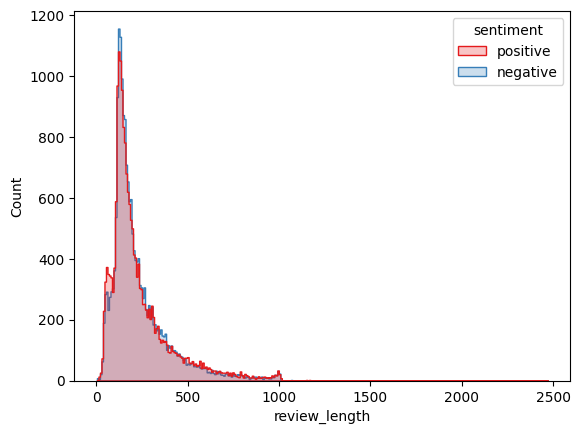

In [10]:
train['review_length'] = train['review'].apply(lambda x: len(x.split()))  # Length in words

sns.histplot(data=train, x='review_length', hue='sentiment', element="step",  bins=300, palette="Set1", common_norm=False)
plt.show()

Both positive and negative reviews show a similar distribution shape, with most reviews being relatively short. The distribution is heavily skewed to the right, indicating that longer reviews are less common.
The two distributions largely overlap, but the positive sentiment reviews appear slightly more concentrated in the lower word count range than negative reviews

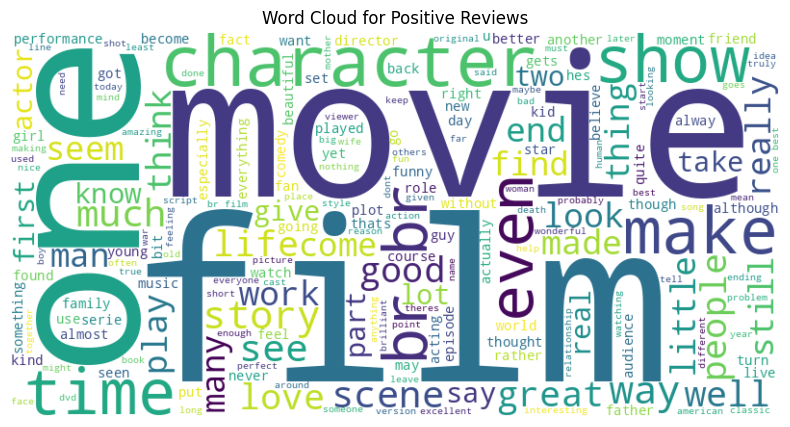

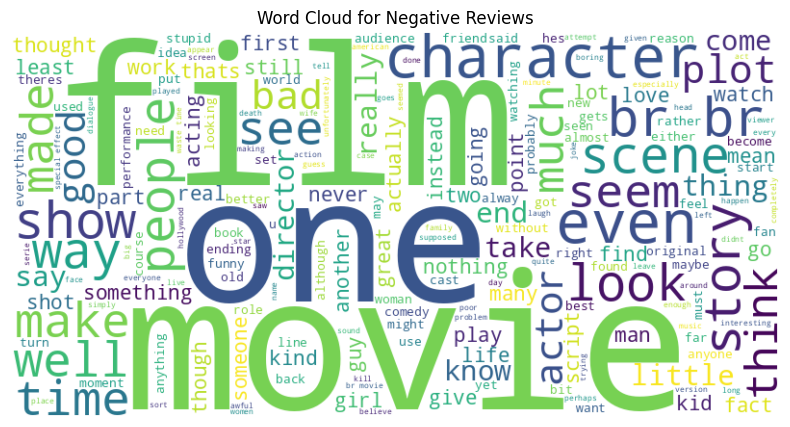

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


positive_text = ' '.join([word for tokens in train[train['sentiment'] == 'positive']['tokens'] for word in tokens])
negative_text = ' '.join([word for tokens in train[train['sentiment'] == 'negative']['tokens'] for word in tokens])

# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Display the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()


The most prominent words in the cloud are "movie," "time," "love," "good," "great," and "story."
The usage of words like "better," "best," "original," and "perfect" show that reviewers often compare the movie to others

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')  # WordNet Lemmatizer
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()


def nltk_lemmatize(tokens):
    # Lemmatize each token in the list of tokens
    return [lemmatizer.lemmatize(token) for token in tokens]

train['lemmas'] = train['tokens'].apply(nltk_lemmatize)
test['lemmas'] = test['tokens'].apply(nltk_lemmatize)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# stemming function
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Applying stemming
    return stemmed_tokens  # Joining back into a single string


train['stemmed_review'] = train['tokens'].apply(stem_text)

test['stemmed_review'] = test['tokens'].apply(stem_text)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [ ]:
# Convert lists of tokens/lemmas back to a single string per document
train['lemmas_joined'] = train['lemmas'].apply(lambda x: ' '.join(x))
test['lemmas_joined'] = test['lemmas'].apply(lambda x: ' '.join(x))


In [ ]:
# Convert lists of tokens/lemmas back to a single string per document
train['stemmed_joined'] = train['stemmed_review'].apply(lambda x: ' '.join(x))
test['stemmed_joined'] = test['stemmed_review'].apply(lambda x: ' '.join(x))


In [ ]:
train

,review,sentiment,tokens,lemmas,stemmed_review,lemmas_joined,stemmed_joined
0,i caught this little gem totally by accident b...,1,"[caught, little, gem, totally, accident, 1980,...","[caught, little, gem, totally, accident, 1980,...","[caught, littl, gem, total, accid, 1980, 81, r...",caught little gem totally accident 1980 81 rev...,caught littl gem total accid 1980 81 reviv the...
1,i cant believe that i let myself into this mov...,0,"[cant, believe, let, movie, accomplish, favor,...","[cant, believe, let, movie, accomplish, favor,...","[cant, believ, let, movi, accomplish, favor, f...",cant believe let movie accomplish favor friend...,cant believ let movi accomplish favor friend a...
2,spoiler alert it just gets to me the nerve som...,0,"[spoiler, alert, gets, nerve, people, remake, ...","[spoiler, alert, get, nerve, people, remake, u...","[spoiler, alert, get, nerv, peopl, remak, use,...",spoiler alert get nerve people remake use term...,spoiler alert get nerv peopl remak use term lo...
3,if theres one thing ive learnt from watching g...,0,"[theres, thing, ive, learnt, watching, george,...","[there, thing, ive, learnt, watching, george, ...","[there, thing, ive, learnt, watch, georg, rome...",there thing ive learnt watching george romeros...,there thing ive learnt watch georg romero cree...
4,i remember when this was in theaters reviews s...,0,"[remember, theaters, reviews, said, horrible, ...","[remember, theater, review, said, horrible, di...","[rememb, theater, review, said, horribl, didnt...",remember theater review said horrible didnt th...,rememb theater review said horribl didnt think...
...,...,...,...,...,...,...,...
39995,its the 1920s and a man named walt disney was ...,1,"[1920s, man, named, walt, disney, mission, sat...","[1920s, man, named, walt, disney, mission, sat...","[1920, man, name, walt, disney, mission, satis...",1920s man named walt disney mission satisfy fa...,1920 man name walt disney mission satisfi fami...
39996,the first and only time i saw shades was durin...,0,"[time, saw, shades, sneakpreview, hadnt, premi...","[time, saw, shade, sneakpreview, hadnt, premie...","[time, saw, shade, sneakpreview, hadnt, premie...",time saw shade sneakpreview hadnt premiere rem...,time saw shade sneakpreview hadnt premier reme...
39997,this was such a waste of time danger if you wa...,0,"[waste, time, danger, watch, tempted, tear, dv...","[waste, time, danger, watch, tempted, tear, dv...","[wast, time, danger, watch, tempt, tear, dvd, ...",waste time danger watch tempted tear dvd wall ...,wast time danger watch tempt tear dvd wall hea...
39998,this is by far the most pathetic movie indian ...,0,"[far, pathetic, movie, indian, cinema, cinema,...","[far, pathetic, movie, indian, cinema, cinema,...","[far, pathet, movi, indian, cinema, cinema, co...",far pathetic movie indian cinema cinema come w...,far pathet movi indian cinema cinema come with...


In [ ]:
# Initialize the CountVectorizer
vectorizer_bow = CountVectorizer()

# Fit the vectorizer on the training data and transform both train and test data
X_train_bow = vectorizer_bow.fit_transform(train['lemmas_joined'])
X_test_bow = vectorizer_bow.transform(test['lemmas_joined'])


In [ ]:
# Initialize the TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

# Fit the vectorizer on the training data and transform both train and test data
X_train_tfidf = vectorizer_tfidf.fit_transform(train['lemmas_joined'])
X_test_tfidf = vectorizer_tfidf.transform(test['lemmas_joined'])


In [ ]:
# Initialize the CountVectorizer
vectorizer_bow = CountVectorizer()

# Fit the vectorizer on the training data and transform both train and test data
X_train_bow_stem = vectorizer_bow.fit_transform(train['stemmed_joined'])
X_test_bow_stem = vectorizer_bow.transform(test['stemmed_joined'])

In [ ]:
# Initialize the TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

# Fit the vectorizer on the training data and transform both train and test data
X_train_tfidf_stem = vectorizer_tfidf.fit_transform(train['stemmed_joined'])
X_test_tfidf_stem = vectorizer_tfidf.transform(test['stemmed_joined'])


In [ ]:
# Map 'positive' to 1 and 'negative' to 0
label_mapping = {'positive': 1, 'negative': 0}
train['sentiment'] = train['sentiment'].map(label_mapping)
test['sentiment'] = test['sentiment'].map(label_mapping)
# Convert labels to tensors



In [ ]:
X_train_tfidf

<40000x148800 sparse matrix of type '<class 'numpy.float64'>'
	with 3483686 stored elements in Compressed Sparse Row format>

In [ ]:
# Train the model with WordNet Lemmatizer
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, train['sentiment'])

# Predict and evaluate
predictions_bow = model_bow.predict(X_test_bow)
accuracy_bow = accuracy_score(test['sentiment'], predictions_bow)
print(f"Accuracy with Bag of Words: {accuracy_bow}")


Accuracy with Bag of Words: 0.856


In [ ]:
# Train the model with WordNet Lemmatizer
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, train['sentiment'])

# Predict and evaluate
predictions_tfidf = model_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(test['sentiment'], predictions_tfidf)
print(f"Accuracy with TF-IDF: {accuracy_tfidf}")


Accuracy with TF-IDF: 0.8653


In [ ]:
# Train the model with PorterStemmer
model_bow_stem = MultinomialNB()
model_bow_stem.fit(X_train_bow_stem, train['sentiment'])

# Predict and evaluate
predictions_bow_stem = model_bow_stem.predict(X_test_bow_stem)
accuracy_bow_stem = accuracy_score(test['sentiment'], predictions_bow_stem)
print(f"Accuracy with Bag of Words: {accuracy_bow_stem}")


Accuracy with Bag of Words: 0.8529


In [ ]:
# Train the model wwith PorterStemmer
model_tfidf_stem = MultinomialNB()
model_tfidf_stem.fit(X_train_tfidf_stem, train['sentiment'])

# Predict and evaluate
predictions_tfidf_stem = model_tfidf_stem.predict(X_test_tfidf_stem)
accuracy_tfidf_stem = accuracy_score(test['sentiment'], predictions_tfidf_stem)
print(f"Accuracy with TF-IDF: {accuracy_tfidf_stem}")


Accuracy with TF-IDF: 0.8606


I compared `WordNet Lemmatizer` and `PorterStemmer`. As well as two vectorizer methods - `CountVectorizer()` and `TfidfVectorizer()`.

Here with NaiveBayes Classifier, we can see that `WordNet Lemmatizer` together with `TfidfVectorizer()` works slightly better on our dataset, so it would be the choice for next models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train with Bag of Words
rf_classifier.fit(X_train_bow, train['sentiment'])
predictions_rf_bow = rf_classifier.predict(X_test_bow)
accuracy_rf_bow = accuracy_score(test['sentiment'], predictions_rf_bow)
print(f"Random Forest Accuracy with Bag of Words: {accuracy_rf_bow}")

# Train with TF-IDF
rf_classifier.fit(X_train_tfidf, train['sentiment'])
predictions_rf_tfidf = rf_classifier.predict(X_test_tfidf)
accuracy_rf_tfidf = accuracy_score(test['sentiment'], predictions_rf_tfidf)
print(f"Random Forest Accuracy with TF-IDF: {accuracy_rf_tfidf}")



Random Forest Accuracy with Bag of Words: 0.8578
Random Forest Accuracy with TF-IDF: 0.8545


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [ ]:
def collate_fn(batch):
    # Unzip the batch
    inputs, labels = zip(*batch)

    # Since inputs are already sparse tensors and don't need batching
    # Convert them to a stacked sparse tensor if you are processing multiple inputs at once
    inputs = torch.stack(inputs, dim=0)

    # Convert labels to a tensor - you might need to modify this depending on your label format
    labels = torch.stack([torch.tensor(label) for label in labels])

    return inputs, labels


In [ ]:

import torch
from torch.utils.data import TensorDataset, DataLoader
from scipy.sparse import csr_matrix

# Convert sparse matrices to PyTorch sparse tensors
X_train_tensor = torch.sparse_coo_tensor(
    torch.LongTensor(X_train_tfidf.nonzero()),
    torch.FloatTensor(X_train_tfidf.data),
    torch.Size(X_train_tfidf.shape)
)
X_test_tensor = torch.sparse_coo_tensor(
    torch.LongTensor(X_test_tfidf.nonzero()),
    torch.FloatTensor(X_test_tfidf.data),
    torch.Size(X_test_tfidf.shape)
)



# Convert labels to integer tensors
y_train_tensor = torch.LongTensor(train['sentiment'].values)
y_test_tensor = torch.LongTensor(test['sentiment'].values)


# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

In [ ]:
# Print the type of data tensors
print(f'Train labels type: {y_train_tensor.dtype}')
print(f'Test labels type: {y_test_tensor.dtype}')

# Optionally check the first few entries
print(f'First 5 train labels: {y_train_tensor[:5]}')
print(f'First 5 test labels: {y_test_tensor[:5]}')


Train labels type: torch.int64
Test labels type: torch.int64
First 5 train labels: tensor([1, 0, 0, 0, 0])
First 5 test labels: tensor([0, 0, 1, 0, 0])


In [ ]:

class TextClassifier(nn.Module):
    def __init__(self, num_features):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(num_features, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.sigmoid(x)  # Ensure output is between 0 and 1
        return x


In [ ]:
num_features = X_train_tensor.shape[1]
num_features

148800

In [ ]:
# Instantiate the model
num_features = X_train_tensor.shape[1]
model = TextClassifier(num_features)

# Loss function
criterion = nn.BCELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:


def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:

            labels = labels.float().unsqueeze(1)  # BCE requires float target tensor

            outputs = model(inputs)
            loss = criterion(outputs, labels)  #  outputs are [0, 1] via sigmoid in model

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Train the model
train_model(model, train_loader, criterion, optimizer)


<ipython-input-55-315d379dba5c>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.stack([torch.tensor(label) for label in labels])


Epoch 1/5, Loss: 0.228608176112175
Epoch 2/5, Loss: 0.1298666000366211
Epoch 3/5, Loss: 0.05693303048610687
Epoch 4/5, Loss: 0.07552559673786163
Epoch 5/5, Loss: 0.0013985962141305208


In [ ]:
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs.data > 0.5).float()  # Threshold prediction
            total += labels.size(0)
            correct += (predicted == labels.unsqueeze(1)).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')

# Evaluate the model
evaluate_model(model, test_loader)


<ipython-input-55-315d379dba5c>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.stack([torch.tensor(label) for label in labels])


Accuracy: 88.68%
